An extension of coffee sorter project: https://edgeryders.eu/t/open-source-coffee-sorter-project/7122
open source optical coffee sorter based on a Raspberry Pi 3

Data source: https://github.com/edgeryders/coffee-cobra

This notebook uses transfer learning and fastai libraries to extend the work done in the above mentioned repo.
Previous reported accuracy: 90%
Accuracy of this program: 99.977%

In [1]:
from fastai.vision import *

In [2]:
path = "data/"

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [3]:
data.classes

['bad', 'good']

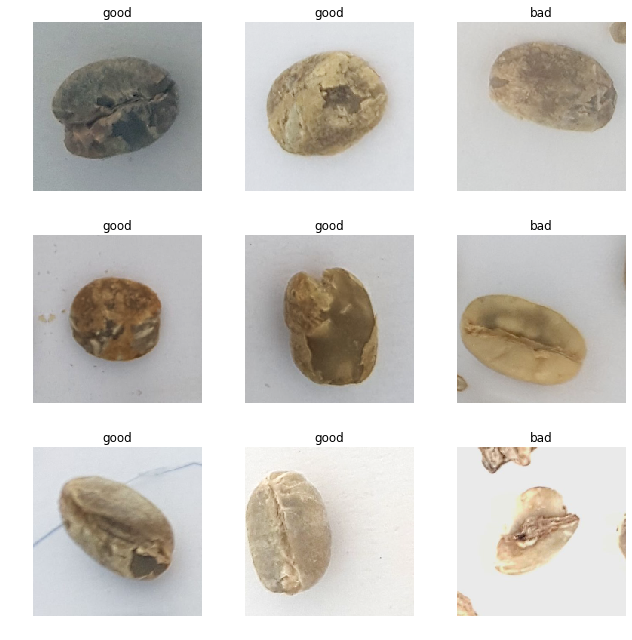

In [4]:
data.show_batch(rows=3, figsize=(9,9))

In [5]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bad', 'good'], 2, 3701, 925)

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.422465,0.249090,0.098378,00:43
1,0.295527,0.150209,0.057297,00:36
2,0.209842,0.111697,0.044324,00:36
3,0.174342,0.107553,0.043243,00:36


In [8]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [14]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.076507,0.095853,0.035676,00:47
1,0.072856,0.051386,0.020541,00:48


In [15]:
learn.load('stage-2');

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

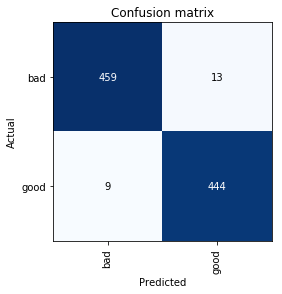

In [17]:
interp.plot_confusion_matrix()